# Setup

In [53]:
import pandas as pd
from pandas.io.json import json_normalize
import json 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols

import pingouin as pg
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scikit_posthocs as sp
from numpy import cov

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [54]:
sns.set_style('white')
sns.set_context("notebook", font_scale=1)
#sns.set_palette("mako")

displot_height = 7

# Data Preparation <a class="anchor" id="Data_Preparation"></a>

In [55]:
df = pd.read_csv("../data//survey_data_final.csv")

***

# Examining distributions in data (descriptive)

### General Survey Particpant statistics
Descriptive statistics + checking for normal distribution to determine reporting method (mean & SD vs. median & IQR)

In [56]:
# Generate descriptive statistics

relevant_cols = ['1_Age', '1_Diabetes_A1cvalue', '1_Diabetes_treatment', '1_Educational_level', '1_Gender', '1_Height', '1_Target_group', '1_Target_group2', '1_Therapy_for_adipositas', '1_Weight', "BMI", 'packagedFoodsScore']

def describe_categorical(input_col):
    c = df[input_col].value_counts(dropna=False)
    p = round(df[input_col].value_counts(dropna=False, normalize=True)*100, 2)
    print(pd.concat([c,p], axis=1, keys=['counts', '%']))

def describe_numeric(input_col):
    #temp_data = pd.to_numeric(df[input_col], downcast="float")
    print("Count: " + str(df[input_col].count())  +"     Mean: " + str(round(df[input_col].mean(),2))  +"     STD: " + str(round(df[input_col].std(), 2)))


print("---- Age ----")
describe_categorical('1_Age')

print("---- Gender ----")
describe_categorical("1_Gender")

print("---- Weight ----")
describe_numeric("1_Weight")

print("---- Height ----")
describe_numeric("1_Height")

print("---- BMI ----")
describe_numeric("BMI")

print("---- Education ----")
describe_categorical("1_Educational_level")

print("---- Group ----")
describe_categorical("1_Target_group")

print("---- Group2 ----")
describe_categorical("1_Target_group2")

print("---- Diabetes treatment ----")
describe_categorical("1_Diabetes_treatment")

---- Age ----
       counts      %
18-30     259  33.25
31-39     183  23.49
40-49     148  19.00
50-59     128  16.43
60-69      45   5.78
70+        16   2.05
---- Gender ----
         counts      %
female      582  74.71
male        194  24.90
various       3   0.39
---- Weight ----
Count: 779     Mean: 68.68     STD: 15.67
---- Height ----
Count: 779     Mean: 170.05     STD: 8.37
---- BMI ----
Count: 779     Mean: 23.67     STD: 4.89
---- Education ----
                              counts      %
University/other tertiary        453  58.15
Vocational apprenticeship        122  15.66
Higher vocational education      119  15.28
Gymnasium- High School level      73   9.37
Compulsory education              12   1.54
---- Group ----
                             counts      %
No, I do not have diabetes      695  89.22
Yes, type 1 diabetes             66   8.47
Yes, type 2 diabetes             12   1.54
Yes, other type of diabetes       6   0.77
---- Group2 ----
                         


------ Age ------
18-30    259
31-39    183
40-49    148
50-59    128
60-69     45
70+       16
Name: 1_Age, dtype: int64


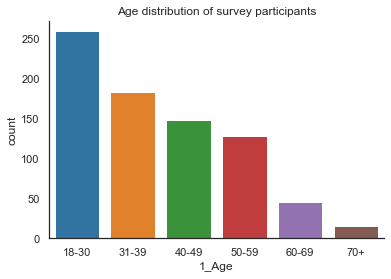

In [57]:
print("\n------ Age ------")
print(df["1_Age"].value_counts())

age_order = ["18-30", "31-39", "40-49", "50-59", "60-69", "70+"]  

plot = sns.countplot(x="1_Age", data=df, order=age_order).set_title("Age distribution of survey participants")
sns.despine(right = True)


fig = plot.get_figure()
#fig.savefig("Other notebooks/condensed_report_files/plots/age_stats001.png")


------ Gender ------
female     582
male       194
various      3
Name: 1_Gender, dtype: int64


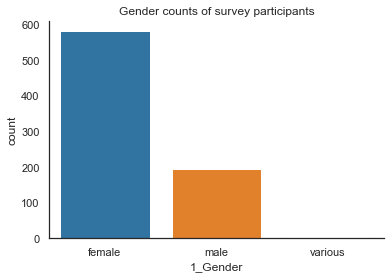

In [58]:
print("\n------ Gender ------")
print(df["1_Gender"].value_counts())

plot = sns.countplot(x="1_Gender", data=df).set_title("Gender counts of survey participants")
sns.despine(right = True)


fig = plot.get_figure()
#fig.savefig("Other notebooks/condensed_report_files/plots/gender_stats001.png")


------ weight ------
count    779.000000
mean      68.676637
std       15.674012
min       44.000000
25%       58.000000
50%       65.000000
75%       75.000000
max      200.000000
Name: 1_Weight, dtype: float64


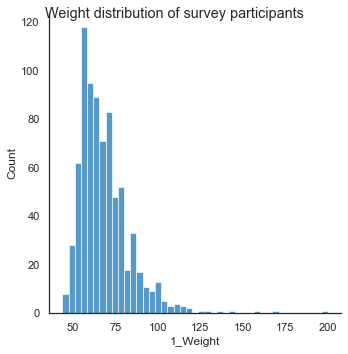

In [59]:
print("\n------ weight ------")
print(df["1_Weight"].describe())

plot = sns.displot(data = df, x="1_Weight")

plot = plot.fig.suptitle("Weight distribution of survey participants")

fig = plot.get_figure()
#fig.savefig("Other notebooks/condensed_report_files/plots/weight_stats001.png")

In [60]:
#checking weight for normal distributin (relevant for how to report in paper, Mean & SD vs Mean & IQR)
print(pg.normality(df["1_Weight"], method='normaltest').round(5))

                  W  pval  normal
1_Weight  427.99517   0.0   False


In [61]:
# => Non normal: Report Median & IQR
print("Median: "+str(df["1_Weight"].median()))

q3, q1 = np.percentile(df["1_Weight"], [75 ,25])
print("IQR: "+str(q1)+" to " + str(q3))

Median: 65.0
IQR: 58.0 to 75.0



------ Height ------
count    779.000000
mean     170.049422
std        8.374151
min      150.000000
25%      164.000000
50%      169.000000
75%      175.000000
max      202.000000
Name: 1_Height, dtype: float64


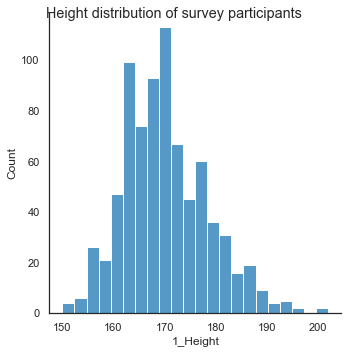

In [62]:
print("\n------ Height ------")
print(df["1_Height"].describe())

plot = sns.displot(data = df, x="1_Height")

plot = plot.fig.suptitle("Height distribution of survey participants")

fig = plot.get_figure()
#fig.savefig("Other notebooks/condensed_report_files/plots/height_stats001.png")

In [63]:
#checking height for normal distributin (relevant for how to report in paper, Mean & SD vs Mean & IQR)
print(pg.normality(df["1_Height"], method='normaltest').round(5))

                 W  pval  normal
1_Height  41.51945   0.0   False


In [64]:
# => Non normal: Report Median & IQR
print("Median: "+str(df["1_Height"].median()))

q3, q1 = np.percentile(df["1_Height"], [75 ,25])
print("IQR: "+str(q1)+" to " + str(q3))

Median: 169.0
IQR: 164.0 to 175.0



------ BMI ------
count    779.000000
mean      23.669828
std        4.889307
min       15.319690
25%       20.814751
50%       22.589551
75%       25.049613
max       88.888889
Name: BMI, dtype: float64


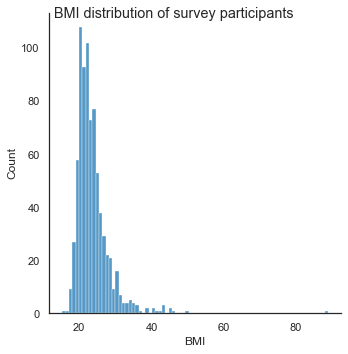

In [65]:
print("\n------ BMI ------")
print(df["BMI"].describe())

plot = sns.displot(data = df, x="BMI")

plot = plot.fig.suptitle("BMI distribution of survey participants")

fig = plot.get_figure()

In [66]:
#checking BMI for normal distributin (relevant for how to report in paper, Mean & SD vs Mean & IQR)
print(pg.normality(df["BMI"], method='normaltest').round(5))

             W  pval  normal
BMI  785.28482   0.0   False


In [67]:
# => Non normal: Report Median & IQR
print("Median: "+str(df["BMI"].median()))

q3, q1 = np.percentile(df["BMI"], [75 ,25])
print("IQR: "+str(q1)+" to " + str(q3))

Median: 22.58955143605005
IQR: 20.814750576669656 to 25.04961286880911



------ Education level ------
University/other tertiary       453
Vocational apprenticeship       122
Higher vocational education     119
Gymnasium- High School level     73
Compulsory education             12
Name: 1_Educational_level, dtype: int64


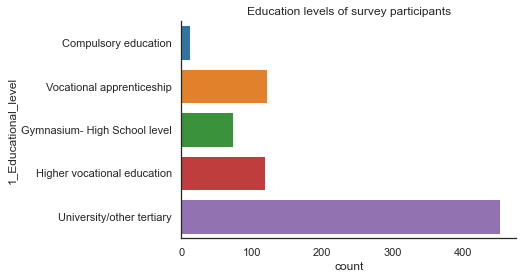

In [68]:
print("\n------ Education level ------")
print(df["1_Educational_level"].value_counts())

education_order = ["Compulsory education", "Vocational apprenticeship", 
                   "Gymnasium- High School level", "Higher vocational education", "University/other tertiary"]

plot = sns.countplot(y="1_Educational_level", data=df, order = education_order).set_title(
    "Education levels of survey participants")
sns.despine(right = True)

fig = plot.get_figure()
#fig.savefig("Other notebooks/condensed_report_files/plots/education_stats001.png", bbox_inches="tight")


------ Target Group general ------
No, I do not have diabetes     695
Yes, type 1 diabetes            66
Yes, type 2 diabetes            12
Yes, other type of diabetes      6
Name: 1_Target_group, dtype: int64


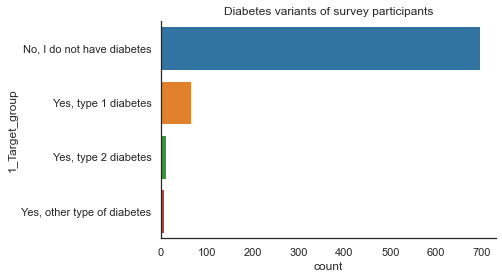

In [69]:
print("\n------ Target Group general ------")
print(df["1_Target_group"].value_counts())

plot = sns.countplot(y="1_Target_group", data=df).set_title(
    "Diabetes variants of survey participants")
sns.despine(right = True)

fig = plot.get_figure()
#fig.savefig("Other notebooks/condensed_report_files/plots/targetgroup_stats001.png", bbox_inches="tight")

### Special descriptive statistics


------ Target Group 2 ------
None of them                         643
Other chronic disease                 79
Obesity (actually or in the past)     57
Name: 1_Target_group2, dtype: int64


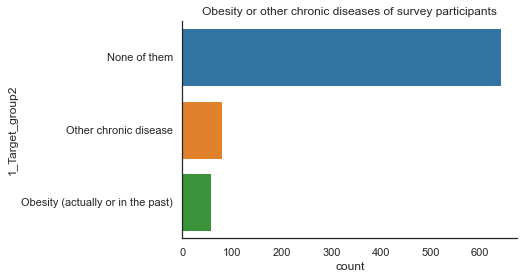

In [70]:
# Special descriptive statistics

print("\n------ Target Group 2 ------")
print(df["1_Target_group2"].value_counts())

plot = sns.countplot(y="1_Target_group2", data=df).set_title(
    "Obesity or other chronic diseases of survey participants")
sns.despine(right = True)

fig = plot.get_figure()
#fig.savefig("Other notebooks/condensed_report_files/plots/targetgroup_chronic_stats001.png", bbox_inches="tight")


------ Adipositas Therapy ------
Diet        15
Surgery     13
Exercise    12
None         7
Drugs        3
Name: 1_Therapy_for_adipositas, dtype: int64


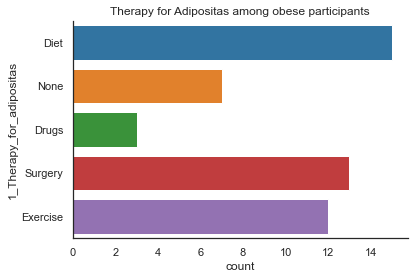

In [71]:
print("\n------ Adipositas Therapy ------")
print(df["1_Therapy_for_adipositas"].value_counts())

plot = sns.countplot(y="1_Therapy_for_adipositas", data=df).set_title("Therapy for Adipositas among obese participants")
sns.despine(right = True)

fig = plot.get_figure()
#fig.savefig("Other notebooks/condensed_report_files/plots/adipositas_therapy_stats001.png")

In [72]:
print("\n------ Diabetes treatment ------")
print(df["1_Diabetes_treatment"].value_counts())


------ Diabetes treatment ------
['Insulin pump']                                                    36
['Insulin pen']                                                     17
['Insulin pen', 'Diet', 'Exercise']                                  9
['Insulin pump', 'Diet', 'Exercise']                                 7
['Diet', 'Exercise']                                                 5
['Insulin pump', 'Exercise']                                         3
['Non-insulin anti-diabetic']                                        2
['Non-insulin anti-diabetic', 'Diet', 'Exercise']                    1
['Insulin pen', 'Insulin pump']                                      1
['Insulin pen', 'Non-insulin anti-diabetic', 'Diet', 'Exercise']     1
['Non-insulin anti-diabetic', 'Diet']                                1
['Diet']                                                             1
Name: 1_Diabetes_treatment, dtype: int64


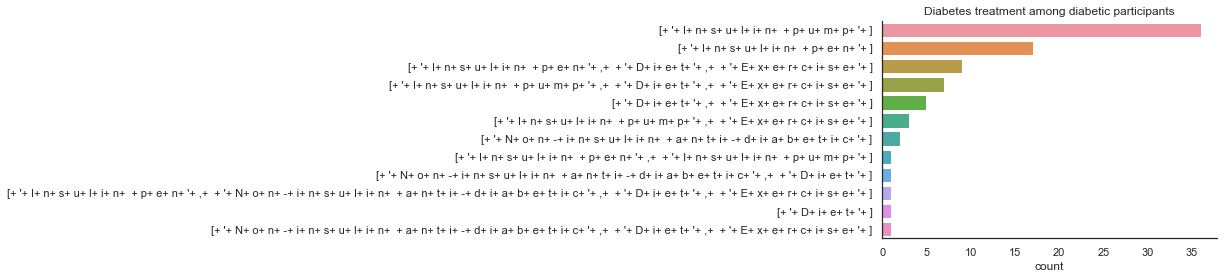

In [73]:
df_temp = df["1_Diabetes_treatment"].dropna().copy()
df_temp['liststring'] = ['+ '.join(map(str, l)) for l in df_temp]
treatment_order = pd.Series(df_temp['liststring']).value_counts().index

plot = sns.countplot(y="liststring", data=df_temp, order = treatment_order).set_title(
    "Diabetes treatment among diabetic participants")
sns.despine(right = True)

fig = plot.get_figure()
#fig.savefig("Other notebooks/condensed_report_files/plots/diabetes_treatment_stats001.png", bbox_inches="tight")

In [74]:
### For the characteristics statistics of the 11 participants of stage 2 of the analysis, visit notebook 2

***

# Statistical Tests on Survey Data

#### Helper Functions

In [75]:
#targetGroup_list = ["healthy", "obese", "diabetes_type1", "diabetes_type2"] #old
targetGroup_list = ["none", "type1", "type2", "other_type"]
p_val = 1

rounding_number = 5

def eval_pval(p_val=p_val):
    if p_val < 0.05:
        print("\x1b[31m\"=> Statistically significant difference between the two groups found\"\x1b[0m") # "\x1b[31m\" for Red text
    else:
        print("=> No statistically significant difference")

def check_normality(values_list):
    i = 1
    for values_item in values_list:
        print("Group no. " + str(i) + ":")
        print("n = " + str(len(values_item)))

        if len(values_item)>=50: #use shapiro wilk with small sample sizes, and D'Agostino with >=50
            print(pg.normality(values_item, method='normaltest').round(rounding_number)) #Using D'agostino's test by setting method to normaltest
        else:
            try:
                stat, p_val = stats.shapiro(values_item)
                print("Shapiro-Wilk p-val: " + str(round(p_val, rounding_number)))
                if p_val >0.05:
                    print("Normal: True\n")
                else:
                    print("Normal: False\n")
            except:
                print("Error: Too few samples for Shapir-Wilk-Test in this group!")
        i += 1
    
    min_list_len = min([len(i) for i in values_list]) #get amount of samples in smallest group examined
    if min_list_len >= 100:
        print("Attention: Sample size of smallest group >100 (n="+str(min_list_len)+"), hence normality assumption can be neglected!\n")


def shortcut_ttest(values_group1, values_group2):
    print(f"Mean Group 1 = {round(np.mean(values_group1),rounding_number)}, SD Group 1 = {round(np.std(values_group1),rounding_number)}")
    print(f"Mean Group 2 = {round(np.mean(values_group2),rounding_number)}, SD Group 2 = {round(np.std(values_group2),rounding_number)}")

    stats_ttest = pg.ttest(x=values_group1, y=values_group2, correction= True) 
    #using pg's implementation of t tests will always use welch's t test when sample sizes are unequal, or by setting correction to 'True'

    p_val = stats_ttest["p-val"][0]
    stat = stats_ttest["T"][0]
    dof = stats_ttest["dof"][0]
    conf_int = stats_ttest["CI95%"][0]

    #Evaluation
    print('t statistic: %.5f' % stat) # It is the ratio of the mean of the difference to the standard error of the difference
    print('p-value: %f' % p_val)
    print('Degrees of Freedom: %f' % dof)

    print("Confidence Interval: "+ str(conf_int))
    eval_pval(p_val)


def shortcut_anova(dependent_var, groups_var, df_name=df):
    aov = pg.welch_anova(dv=dependent_var, between=groups_var, data=df_name)
    print(aov)
    p_val = aov.iloc[0][4]
    #print("P-Value: " + str(round(p_val, rounding_number)))
    eval_pval(p_val)


def shortcut_mwu(values_group1, values_group2):
    print(f"Mean Group 1 = {round(np.mean(values_group1),rounding_number)}, SD Group 1 = {round(np.std(values_group1),rounding_number)}")
    print(f"Median Group 1 = {round(np.median(values_group1),rounding_number)}, IQR Group 1 = {round(np.percentile(values_group1,75) - np.percentile(values_group1,25), rounding_number)}")
    print(f"n Group 1: {len(values_group1)}")
    print(f"Mean Group 2 = {round(np.mean(values_group2),rounding_number)}, SD Group 2 = {round(np.std(values_group2),rounding_number)}")
    print(f"Median Group 2 = {round(np.median(values_group2),rounding_number)}, IQR Group 2 = {round(np.percentile(values_group2,75) - np.percentile(values_group2,25), rounding_number)}")
    print(f"n Group 2: {len(values_group2)}")

    results = pg.mwu(values_group1, values_group2)
    print(results)
    p_val = results.iloc[0][2]
    eval_pval(p_val)


def calculate_correlation(col_name1, col_name2, type="pearson"):
    
    df_corr = df.copy()
    df_corr = df_corr[[col_name1, col_name2]].dropna()
   
    print("Degrees of freedom: "+ str(len(df_corr)-2))

    if type == "spearman":
        stat, p_val = stats.spearmanr(df_corr[col_name1], df_corr[col_name2])
    else:
        stat, p_val = stats.pearsonr(df_corr[col_name1], df_corr[col_name2])

    print("Correlation coefficient: %.5f" % stat)
    print('p-value: %f' % p_val)
    eval_pval(p_val)

        
def calculate_correlation_multigroup(col_name1, col_name2, type="pearson"):
    
    df_corr = df2.copy()
    df_corr = df_corr[[col_name1, col_name2, "question_design"]].dropna()
   
    print("Degrees of freedom: "+ str(len(df_corr[df_corr["question_design"]==t_group])-2))
        
    if type == "spearman":
        stat, p_val = stats.spearmanr(
            df_corr[df_corr["question_design"]==t_group][col_name1], #t_group is defined in loop outside of this function in respective cell
            df_corr[df_corr["question_design"]==t_group][col_name2]
            )
    else:
        stat, p_val = stats.pearsonr(
            df_corr[df_corr["question_design"]==t_group][col_name1], 
            df_corr[df_corr["question_design"]==t_group][col_name2]
            )

    print("Correlation coefficient: %.5f" % stat)
    print('p-value: %f' % p_val)
    eval_pval(p_val)


def create_kde_plot(group1, group2, target, height, aspect = 0.2, df_input=df):
    N1 = len(df_input[group1].unique()) #
    #colour = ['gray', 'blue', 'green', 'darkorange']

    fig, axs = plt.subplots(1,3, # rows and columns
                            figsize=(N1*height,N1*height*aspect), sharey=True)
    for (group1Name,df1),ax in zip(df_input.groupby(group1),axs):
        ax.set_title(group1Name)
        for (group2Name,df2) in df1.groupby(group2): 
            sns.kdeplot(df2[target], shade=True, label=group2Name, ax=ax) 
            
            plt.legend(loc="upper left")

***

## Survey performance in the first part (packaged foods)
### Overall score



In [76]:
print("Mean score: " + str(round(df.packagedFoodsScore.mean(),4)*100)+"%")
print("SD " + str(round(df.packagedFoodsScore.std(),4)*100)+"%")

Mean score: 42.54%
SD 18.22%


### Packaged foods score by characteristic

#### By gender

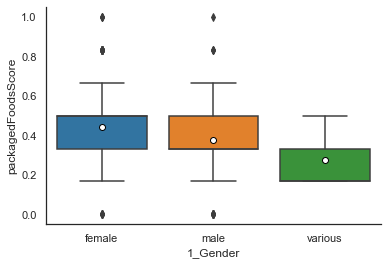

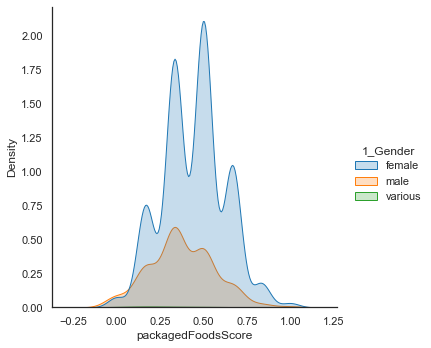

In [77]:
plot = sns.boxplot(x="1_Gender", y="packagedFoodsScore", data=df, 
                   showmeans=True, 
                   meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})
sns.despine(right = True)

fig = plot.get_figure()

plot = sns.displot(df, x="packagedFoodsScore", hue="1_Gender", kind="kde", fill=True)

In [78]:
# Checking assumptions

#excluding "various" due to extremely low sample sizer (n=3)

values_group1 = list(df[df["1_Gender"]=="female"].packagedFoodsScore.dropna())
values_group2 = list(df[df["1_Gender"]=="male"].packagedFoodsScore.dropna())

# 1 Normality
check_normality([values_group1, values_group2])

# Conducting t test
shortcut_ttest(values_group1, values_group2)

Group no. 1:
n = 576
         W     pval  normal
0  1.22492  0.54202    True
Group no. 2:
n = 192
         W     pval  normal
0  1.94614  0.37792    True
Attention: Sample size of smallest group >100 (n=192), hence normality assumption can be neglected!

Mean Group 1 = 0.443, SD Group 1 = 0.17754
Mean Group 2 = 0.375, SD Group 2 = 0.18556
t statistic: 4.43477
p-value: 0.000013
Degrees of Freedom: 315.142043
Confidence Interval: [0.04 0.1 ]
"=> Statistically significant difference between the two groups found"


#### by age groups

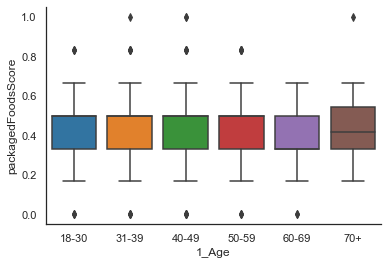

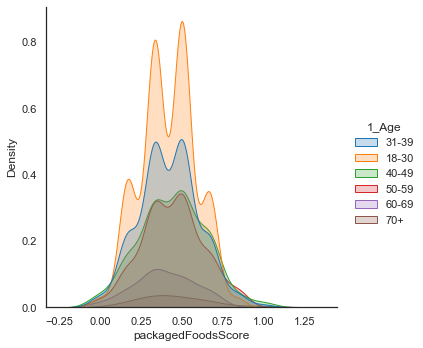

In [79]:
# Initial visual inspection with plots

plot = sns.boxplot(x="1_Age", y="packagedFoodsScore", data=df, order=["18-30", "31-39", "40-49", "50-59", "60-69", "70+"])
sns.despine(right = True)

fig = plot.get_figure()

plot = sns.displot(df, x="packagedFoodsScore", hue="1_Age", kind="kde", fill=True)
sns.despine(right = True)

In [80]:
for age_group in list(df['1_Age'].unique()):
    check_normality([df[df["1_Age"]==age_group]["packagedFoodsScore"]])

Group no. 1:
n = 183
                          W     pval  normal
packagedFoodsScore  0.94767  0.62261    True
Attention: Sample size of smallest group >100 (n=183), hence normality assumption can be neglected!

Group no. 1:
n = 259
                          W     pval  normal
packagedFoodsScore  3.20145  0.20175    True
Attention: Sample size of smallest group >100 (n=259), hence normality assumption can be neglected!

Group no. 1:
n = 148
                          W     pval  normal
packagedFoodsScore  0.12774  0.93813    True
Attention: Sample size of smallest group >100 (n=148), hence normality assumption can be neglected!

Group no. 1:
n = 128
                          W     pval  normal
packagedFoodsScore  0.18389  0.91216    True
Attention: Sample size of smallest group >100 (n=128), hence normality assumption can be neglected!

Group no. 1:
n = 45
Shapiro-Wilk p-val: 1.0
Normal: True

Group no. 1:
n = 16
Shapiro-Wilk p-val: 0.06808
Normal: True



In [81]:
shortcut_anova(dependent_var="packagedFoodsScore", groups_var="1_Age")

  Source  ddof1       ddof2         F     p-unc       np2
0  1_Age      5  115.827342  0.999709  0.421208  0.006978
=> No statistically significant difference


#### By education level

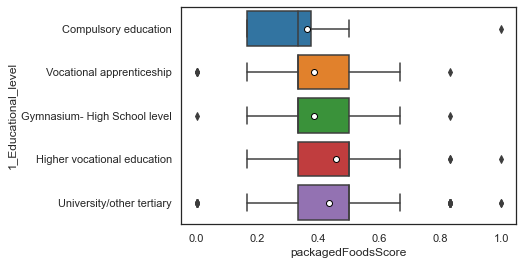

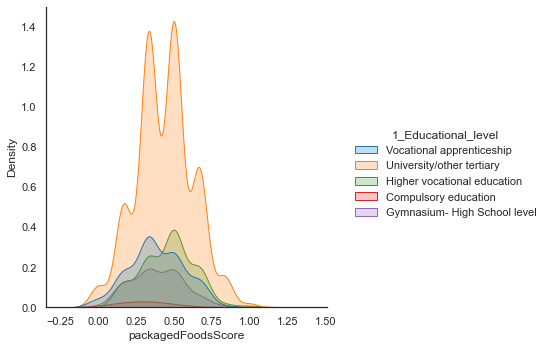

In [82]:
plot = sns.boxplot(x="packagedFoodsScore", y="1_Educational_level", data=df, order = education_order,
                  showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

fig = plot.get_figure()

plot = sns.displot(df, x="packagedFoodsScore", hue="1_Educational_level", kind="kde", fill=True)

In [83]:
for edu_group in list(df['1_Educational_level'].unique()):
    check_normality([df[df["1_Educational_level"]==edu_group]["packagedFoodsScore"]])

Group no. 1:
n = 122
                          W     pval  normal
packagedFoodsScore  1.35669  0.50746    True
Attention: Sample size of smallest group >100 (n=122), hence normality assumption can be neglected!

Group no. 1:
n = 453
                         W     pval  normal
packagedFoodsScore  0.4105  0.81444    True
Attention: Sample size of smallest group >100 (n=453), hence normality assumption can be neglected!

Group no. 1:
n = 119
                          W    pval  normal
packagedFoodsScore  0.11992  0.9418    True
Attention: Sample size of smallest group >100 (n=119), hence normality assumption can be neglected!

Group no. 1:
n = 12
Shapiro-Wilk p-val: 0.00265
Normal: False

Group no. 1:
n = 73
                          W     pval  normal
packagedFoodsScore  0.77253  0.67959    True


In [84]:
# Mean scores per groups & Std'

print(
    "Mean Compulsory education = " + str(round(df[df["1_Educational_level"] == "Compulsory education"].packagedFoodsScore.dropna().mean(),rounding_number)) + 
    "   STD = "+str(round(df[df["1_Educational_level"] == "Compulsory education"].packagedFoodsScore.dropna().std(),rounding_number)) +
    
    "\nMean Vocational apprenticeship = " + str(round(df[df["1_Educational_level"] == "Vocational apprenticeship"].packagedFoodsScore.dropna().mean(),rounding_number)) + 
    "   STD = "+str(round(df[df["1_Educational_level"] == "Vocational apprenticeship"].packagedFoodsScore.dropna().std(),rounding_number)) +
    
    "\nMean Gymnasium / High School level = " + str(round(df[df["1_Educational_level"] == "Gymnasium- High School level"].packagedFoodsScore.dropna().mean(),rounding_number)) + 
    "   STD = "+str(round(df[df["1_Educational_level"] == "Gymnasium- High School level"].packagedFoodsScore.dropna().std(),rounding_number)) +

    "\nMean Higher vocational education = " + str(round(df[df["1_Educational_level"] == "Higher vocational education"].packagedFoodsScore.dropna().mean(),rounding_number)) + 
    "   STD = "+str(round(df[df["1_Educational_level"] == "Higher vocational education"].packagedFoodsScore.dropna().std(),rounding_number)) +

    "\nMean University/other tertiary= " + str(round(df[df["1_Educational_level"] == "University/other tertiary"].packagedFoodsScore.dropna().mean(),rounding_number)) + 
    "   STD = "+str(round(df[df["1_Educational_level"] == "University/other tertiary"].packagedFoodsScore.dropna().std(),rounding_number))
    )

Mean Compulsory education = 0.36111   STD = 0.23391
Mean Vocational apprenticeship = 0.38525   STD = 0.17938
Mean Gymnasium / High School level = 0.38584   STD = 0.16868
Mean Higher vocational education = 0.45938   STD = 0.17081
Mean University/other tertiary= 0.43558   STD = 0.18406


In [85]:
shortcut_anova(dependent_var="packagedFoodsScore", groups_var="1_Educational_level")

                Source  ddof1     ddof2         F     p-unc       np2
0  1_Educational_level      4  71.17111  4.159367  0.004388  0.021275
"=> Statistically significant difference between the two groups found"


In [86]:
# Post Hoc Comparision to find out which of the group means differs
# Dunn's test
dunn_result = sp.posthoc_dunn(
    [
    df[df["1_Educational_level"] == "Compulsory education"].packagedFoodsScore.dropna(),
    df[df["1_Educational_level"] == "Vocational apprenticeship"].packagedFoodsScore.dropna(), 
    df[df["1_Educational_level"] == "Gymnasium- High School level"].packagedFoodsScore.dropna(),
    df[df["1_Educational_level"] == "Higher vocational education"].packagedFoodsScore.dropna(),
    df[df["1_Educational_level"] == "University/other tertiary"].packagedFoodsScore.dropna()  
    ],
    p_adjust = 'bonferroni')

dunn_result[dunn_result < 0.05]

,1,2,3,4,5
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.016929,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,0.016929,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN


#### by BMI (correlation)

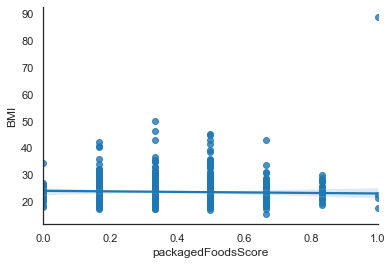

In [87]:
# Assumptions of pearson's correlation coefficient:

# 1) Continous data for both variables: yes

# 2) linearly related variables
# -> check via scatter plot
sns.regplot(x="packagedFoodsScore", y="BMI", data=df);
sns.despine(right = True)
##plt.savefig("Other notebooks/condensed_report_files/plots/2_7_lmplot_mean.png")

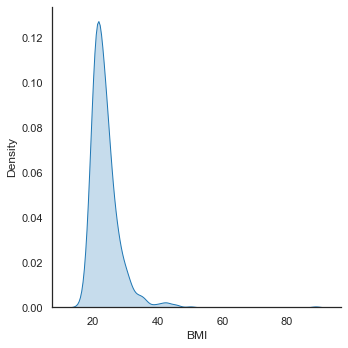

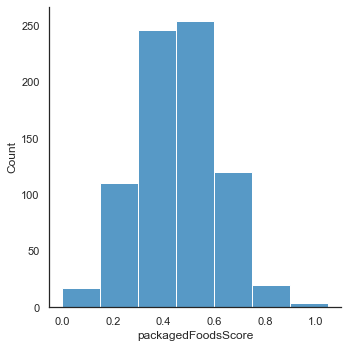

In [88]:
# 3) Both variables are normally distributed (1) (Visual Inspection)
sns.displot(df, x="BMI", kind="kde", fill=True)

# 3) Both variables are normally distributed (2) (Visual Inspection)
sns.displot(df, x="packagedFoodsScore",binwidth=0.15, fill=True)

In [89]:
# 3) Both variables are normally distributed (1) (Inspection using stat. test)

check_normality([df["BMI"], df["packagedFoodsScore"]])

Group no. 1:
n = 779
             W  pval  normal
BMI  785.28482   0.0   False
Group no. 2:
n = 779
                          W     pval  normal
packagedFoodsScore  1.64843  0.43858    True
Attention: Sample size of smallest group >100 (n=779), hence normality assumption can be neglected!



In [90]:
# Running correlation test

calculate_correlation("BMI", "packagedFoodsScore", type="spearman")

Degrees of freedom: 769
Correlation coefficient: -0.11701
p-value: 0.001134
"=> Statistically significant difference between the two groups found"


#### by overweight vs normal weight

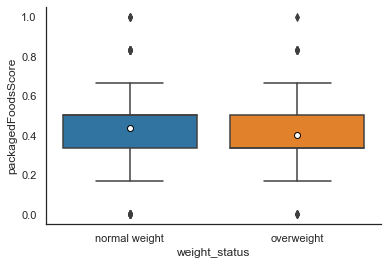

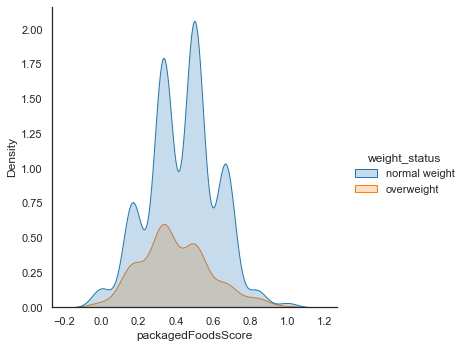

In [91]:
df_temp = df.copy()
df_temp['weight_status'] = np.where(df['BMI'] >= 25, "overweight", "normal weight")

plot = sns.boxplot(x="weight_status", y="packagedFoodsScore", data=df_temp, 
                   showmeans=True, 
                   meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})
sns.despine(right = True)

fig = plot.get_figure()
plot = sns.displot(df_temp, x="packagedFoodsScore", hue="weight_status", kind="kde", fill=True)

In [92]:
# Checking assumptions

values_group1 = list(df_temp[df_temp["weight_status"]=="overweight"].packagedFoodsScore.dropna())
values_group2 = list(df_temp[df_temp["weight_status"]=="normal weight"].packagedFoodsScore.dropna())

# 1 Normality
check_normality([values_group1, values_group2])

# => With n = circa 200, the minor violation of normality could be neglected; nonetheless running MWU instead
# shortcut_ttest(values_group1, values_group2)
shortcut_mwu(values_group1, values_group2)

Group no. 1:
n = 196
         W     pval  normal
0  7.00341  0.03015   False
Group no. 2:
n = 575
         W     pval  normal
0  0.05272  0.97399    True
Attention: Sample size of smallest group >100 (n=196), hence normality assumption can be neglected!

Mean Group 1 = 0.39881, SD Group 1 = 0.18624
Median Group 1 = 0.33333, IQR Group 1 = 0.16667
n Group 1: 196
Mean Group 2 = 0.43449, SD Group 2 = 0.1798
Median Group 2 = 0.5, IQR Group 2 = 0.16667
n Group 2: 575
       U-val alternative     p-val       RBC      CLES
MWU  49055.0   two-sided  0.004853  0.129459  0.435271
"=> Statistically significant difference between the two groups found"


#### by obese vs non-obese

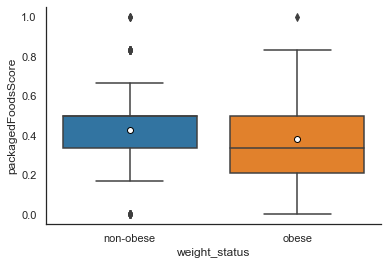

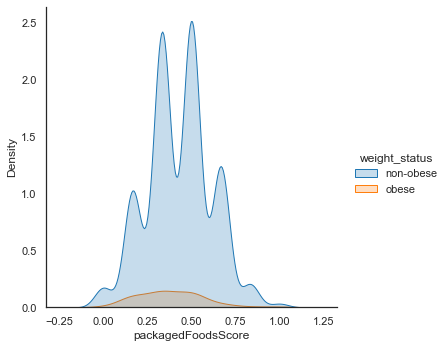

In [93]:
df_temp = df.copy()
df_temp['weight_status'] = np.where(df['BMI'] >= 30, "obese", "non-obese")

plot = sns.boxplot(x="weight_status", y="packagedFoodsScore", data=df_temp, 
                   showmeans=True, 
                   meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})
sns.despine(right = True)

fig = plot.get_figure()
plot = sns.displot(df_temp, x="packagedFoodsScore", hue="weight_status", kind="kde", fill=True)

In [94]:
# Checking assumptions

values_group1 = list(df_temp[df_temp["weight_status"]=="obese"].packagedFoodsScore.dropna())
values_group2 = list(df_temp[df_temp["weight_status"]=="non-obese"].packagedFoodsScore.dropna())

# 1 Normality
check_normality([values_group1, values_group2])

# => Non-normal!
#shortcut_ttest(values_group1, values_group2)
shortcut_mwu(values_group1, values_group2)

Group no. 1:
n = 58
         W     pval  normal
0  7.16492  0.02781   False
Group no. 2:
n = 713
         W     pval  normal
0  0.83105  0.65999    True
Mean Group 1 = 0.38218, SD Group 1 = 0.18572
Median Group 1 = 0.33333, IQR Group 1 = 0.29167
n Group 1: 58
Mean Group 2 = 0.42894, SD Group 2 = 0.18137
Median Group 2 = 0.5, IQR Group 2 = 0.16667
n Group 2: 713
       U-val alternative     p-val       RBC      CLES
MWU  17358.5   two-sided  0.034428  0.160492  0.419754
"=> Statistically significant difference between the two groups found"


#### Diabetic vs non-diabetic

In [95]:
print("Comparing diabetic vs non-diabetic participants:")

# Checking assumptions
values_group1 = list(df[df["diabetes_detail"]=="none"].packagedFoodsScore.dropna())
values_group2 = list(df[df["diabetes_detail"]!="none"].packagedFoodsScore.dropna())

# 1 Normality
check_normality([values_group1, values_group2])

# Running t test
shortcut_ttest(values_group1, values_group2)

Comparing diabetic vs non-diabetic participants:
Group no. 1:
n = 687
         W     pval  normal
0  1.60849  0.44743    True
Group no. 2:
n = 84
         W     pval  normal
0  5.88566  0.05272    True
Mean Group 1 = 0.42455, SD Group 1 = 0.17807
Mean Group 2 = 0.43254, SD Group 2 = 0.21226
t statistic: -0.32915
p-value: 0.742744
Degrees of Freedom: 97.651974
Confidence Interval: [-0.06  0.04]
=> No statistically significant difference


#### By type of diabetes

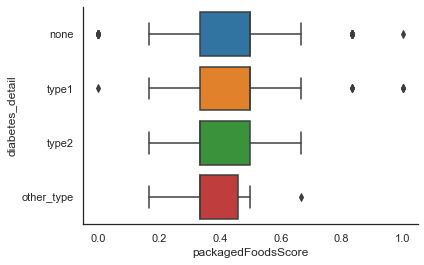

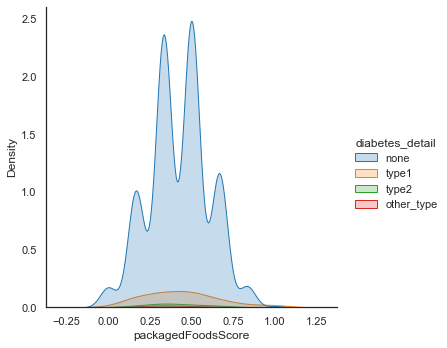

In [96]:
# Initial visual inspection with plots

plot = sns.boxplot(x="packagedFoodsScore", y="diabetes_detail", data=df)
sns.despine(right = True)

fig = plot.get_figure()

plot = sns.displot(df, x="packagedFoodsScore", hue="diabetes_detail", kind="kde", fill=True)
sns.despine(right = True)

In [97]:
print("Comparing the different types of diabetes:")
for group in list(df['diabetes_detail'].unique()):
    check_normality([df[df["diabetes_detail"]==group]["packagedFoodsScore"]])

Comparing the different types of diabetes:
Group no. 1:
n = 695
                          W     pval  normal
packagedFoodsScore  1.60849  0.44743    True
Attention: Sample size of smallest group >100 (n=695), hence normality assumption can be neglected!

Group no. 1:
n = 66
                          W     pval  normal
packagedFoodsScore  4.08895  0.12945    True
Group no. 1:
n = 12
Shapiro-Wilk p-val: 0.1369
Normal: True

Group no. 1:
n = 6
Shapiro-Wilk p-val: 0.47327
Normal: True



In [98]:
shortcut_anova(dependent_var="packagedFoodsScore", groups_var="diabetes_detail")

            Source  ddof1      ddof2         F     p-unc       np2
0  diabetes_detail      3  16.783748  0.263713  0.850556  0.001277
=> No statistically significant difference


***

## Survey performance in the second part (meal pictures; within each question design group)
### Overall score
(Note: For type 1, a lower score is better. For the rest, a higher score (more % of questions correct) is better!)



In [99]:
#Filtering out two participants who had not answered any questions in the second part, but only in the first part
df2 = df[~((df[df.columns[16:-12]].isna().all(1)) & (df["diabetes_detail"]=="type1") & (df["packagedFoodsScore"]!=0))]

question_design_type_list = ['MC cals (no DM)', 'amount carbs (T1DM)', 'MC carbs (T2DM+O)'] # MC = Multiple choice

# Adding other_type of diabetes to type2 (same question design)
df2["question_design"] = df2["diabetes_detail"]
replacement_dict = {"none" : 'MC cals (no DM)', "type1" : 'amount carbs (T1DM)', "type2" : 'MC carbs (T2DM+O)', "other_type" : 'MC carbs (T2DM+O)'}
df2=df2.replace({"question_design": replacement_dict})

df2["question_design"].value_counts()

<ipython-input-99-055e58aa186c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["question_design"] = df2["diabetes_detail"]


MC cals (no DM)        695
amount carbs (T1DM)     64
MC carbs (T2DM+O)       18
Name: question_design, dtype: int64

In [100]:
# Overall statistics

# print("For non-type-1-diabetic participants:")
# print("Mean score: " + str(round(df2[df2["diabetes_detail"]!="type1"].mealsScore.mean(),4)*100)+"%")
# print("SD " + str(round(df2[df2["diabetes_detail"]!="type1"].mealsScore.std(),4)*100)+"%")

print("For type-1-diabetic participants (different measure; guessing error):")
print("Mean score: " + str(round(df2[df2["question_design"]=="amount carbs (T1DM)"].mealsScore.mean(),4)*100)+"%")
print("SD " + str(round(df2[df2["question_design"]=="amount carbs (T1DM)"].mealsScore.std(),4)*100)+"% \n")

print("For type-2-diabetic and other types of diabetes participants:")
print("Mean score: " + str(round(df2[df2["question_design"]=="MC carbs (T2DM+O)"].mealsScore.mean(),4)*100)+"%")
print("SD " + str(round(df2[df2["question_design"]=="MC carbs (T2DM+O)"].mealsScore.std(),4)*100)+"% \n")

print("For non-diabetic participants:")
print("Mean score: " + str(round(df2[df2["question_design"]=="MC cals (no DM)"].mealsScore.mean(),4)*100)+"%")
print("SD " + str(round(df2[df2["question_design"]=="MC cals (no DM)"].mealsScore.std(),4)*100)+"% \n")

For type-1-diabetic participants (different measure; guessing error):
Mean score: 61.77%
SD 47.660000000000004% 

For type-2-diabetic and other types of diabetes participants:
Mean score: 25.0%
SD 20.560000000000002% 

For non-diabetic participants:
Mean score: 33.33%
SD 17.96% 



#### gender (within each target group)

/Users/marcbloech/opt/anaconda3/envs/env_3_8_8/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/marcbloech/opt/anaconda3/envs/env_3_8_8/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/marcbloech/opt/anaconda3/envs/env_3_8_8/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/marcbloech/opt/anaconda3/envs/env_3_8_8/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


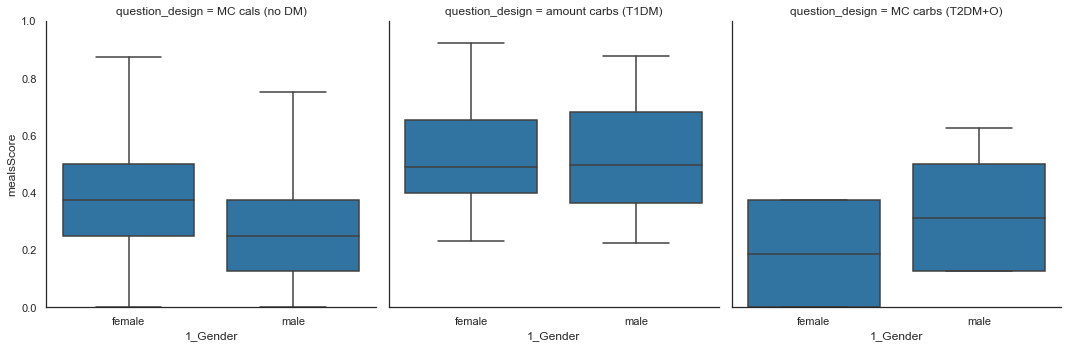

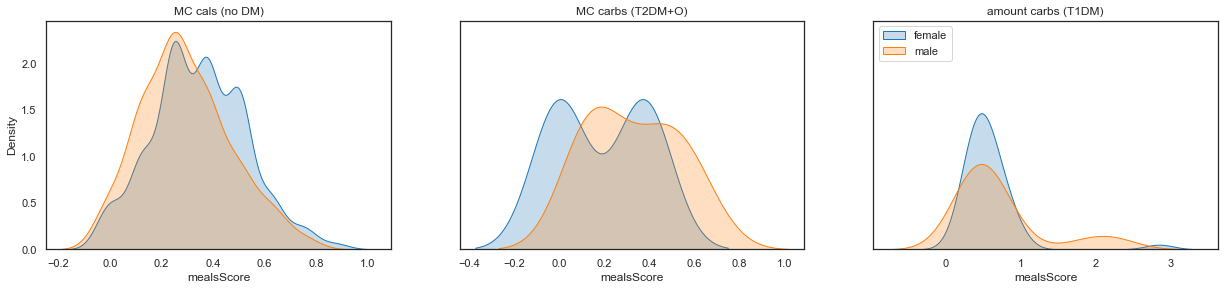

In [101]:
g = sns.FacetGrid(df2, col="question_design", size=5)
g = g.map(sns.boxplot, "1_Gender", "mealsScore")
g.set(ylim=(0, 1))

create_kde_plot("question_design", "1_Gender", "mealsScore", displot_height,df_input=df2)

In [102]:
# Assess normality within each group

for t_group in question_design_type_list:
    print("Target group: " + t_group)
    
    df_temp = df2[df2["question_design"] == t_group]

    values_group1 = list(df_temp[df_temp["1_Gender"]=="male"].packagedFoodsScore.dropna())
    values_group2 = list(df_temp[df_temp["1_Gender"]=="female"].packagedFoodsScore.dropna())

    # 1 Normality
    check_normality([values_group1, values_group2])
        
    print("----------------")

Target group: MC cals (no DM)
Group no. 1:
n = 162
         W    pval  normal
0  0.34086  0.8433    True
Group no. 2:
n = 523
         W     pval  normal
0  1.29965  0.52214    True
Attention: Sample size of smallest group >100 (n=162), hence normality assumption can be neglected!

----------------
Target group: amount carbs (T1DM)
Group no. 1:
n = 21
Shapiro-Wilk p-val: 0.27045
Normal: True

Group no. 2:
n = 42
Shapiro-Wilk p-val: 0.00209
Normal: False

----------------
Target group: MC carbs (T2DM+O)
Group no. 1:
n = 8
Shapiro-Wilk p-val: 0.00518
Normal: False

Group no. 2:
n = 10
Shapiro-Wilk p-val: 0.12398
Normal: True

----------------


In [103]:
# because some groups are non normal, use Mann Whitney U test for all

for t_group in question_design_type_list:
    print("Target group: " + t_group)
    df_temp = df2.copy()
    df_temp = df_temp[df_temp["question_design"] == t_group]
    values_group1 = list(df_temp[df_temp["1_Gender"]=="female"].generalScore.dropna())
    values_group2 = list(df_temp[df_temp["1_Gender"]=="male"].generalScore.dropna())
    
    shortcut_mwu(values_group1, values_group2)
    
    print("---------------------------")

Target group: MC cals (no DM)
Mean Group 1 = 0.38692, SD Group 1 = 0.13226
Median Group 1 = 0.35714, IQR Group 1 = 0.21429
n Group 1: 523
Mean Group 2 = 0.3276, SD Group 2 = 0.11922
Median Group 2 = 0.28571, IQR Group 2 = 0.14286
n Group 2: 162
       U-val alternative         p-val       RBC      CLES
MWU  53443.0   two-sided  3.302497e-07 -0.261549  0.630774
"=> Statistically significant difference between the two groups found"
---------------------------
Target group: amount carbs (T1DM)
Mean Group 1 = 0.57769, SD Group 1 = 0.39893
Median Group 1 = 0.48865, IQR Group 1 = 0.25281
n Group 1: 42
Mean Group 2 = 0.7158, SD Group 2 = 0.58605
Median Group 2 = 0.49681, IQR Group 2 = 0.31706
n Group 2: 21
     U-val alternative     p-val       RBC      CLES
MWU  425.0   two-sided  0.821206  0.036281  0.481859
=> No statistically significant difference
---------------------------
Target group: MC carbs (T2DM+O)
Mean Group 1 = 0.3, SD Group 1 = 0.13851
Median Group 1 = 0.32143, IQR Group 1 = 0

#### Age groups (within each target group)

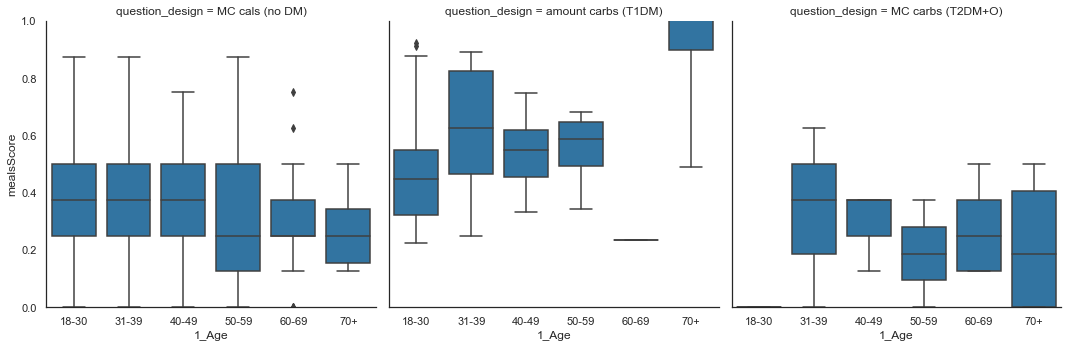

In [104]:
# Initial visual inspection with plots

# ATTENTION: "diabetes_type2" also includes "other type of diabetes"!

g = sns.FacetGrid(df2, col="question_design", height=5)
g = g.map(sns.boxplot, "1_Age", "mealsScore", order=age_order)
g.set(ylim=(0, 1))

/Users/marcbloech/opt/anaconda3/envs/env_3_8_8/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/marcbloech/opt/anaconda3/envs/env_3_8_8/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


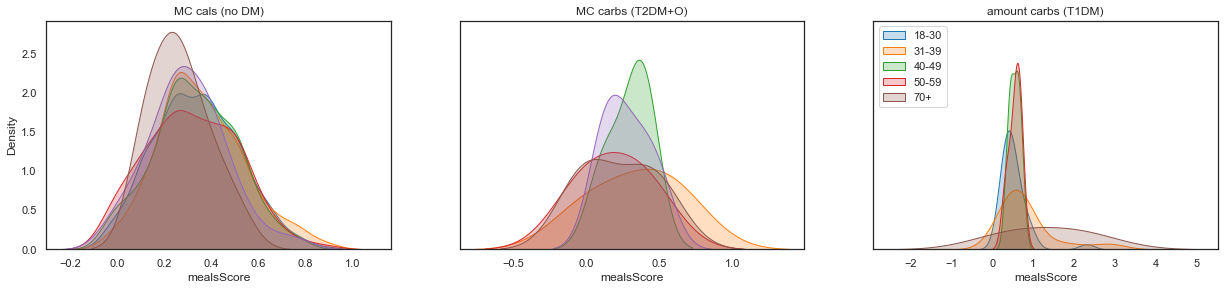

In [105]:
#Note: FacetGrid did not want to work, so here is a workaround...

create_kde_plot("question_design", "1_Age", "mealsScore", displot_height, df_input=df2)

In [106]:
for t_group in question_design_type_list:
    print("## Target group: " + t_group)
    for group in list(df['1_Age'].unique()):
        print("Age group: " + group)
        check_normality([df2[(df2["question_design"] == t_group) & (df2["1_Age"] == group)]["mealsScore"]])
    print("#####################\n")

## Target group: MC cals (no DM)
Age group: 31-39
Group no. 1:
n = 165
                 W     pval  normal
mealsScore  6.1372  0.04649   False
Attention: Sample size of smallest group >100 (n=165), hence normality assumption can be neglected!

Age group: 18-30
Group no. 1:
n = 225
                  W    pval  normal
mealsScore  2.85338  0.2401    True
Attention: Sample size of smallest group >100 (n=225), hence normality assumption can be neglected!

Age group: 40-49
Group no. 1:
n = 135
                  W     pval  normal
mealsScore  0.60806  0.73784    True
Attention: Sample size of smallest group >100 (n=135), hence normality assumption can be neglected!

Age group: 50-59
Group no. 1:
n = 121
                  W     pval  normal
mealsScore  1.93251  0.38051    True
Attention: Sample size of smallest group >100 (n=121), hence normality assumption can be neglected!

Age group: 60-69
Group no. 1:
n = 39
Shapiro-Wilk p-val: 0.04334
Normal: False

Age group: 70+
Group no. 1:
n = 10
Shap

In [107]:
# ==> Because for some of the groups the residuals 
# aren't normally distributed & n<25, we will use the Kruskall wallis test
# out of efficiency purposes (i.e. to use a loop)

for t_group in question_design_type_list:
    print("Target group: " + t_group)
    
    df_temp = df2[df2["question_design"] == t_group]
    
    stat, p_val = stats.kruskal(
        df_temp[df_temp["1_Age"] == "18-30"].mealsScore.dropna(), 
        df_temp[df_temp["1_Age"] == "31-39"].mealsScore.dropna(), 
        df_temp[df_temp["1_Age"] == "40-49"].mealsScore.dropna(),
        df_temp[df_temp["1_Age"] == "50-59"].mealsScore.dropna(),
        df_temp[df_temp["1_Age"] == "60-69"].mealsScore.dropna(),
        df_temp[df_temp["1_Age"] == "70+"].mealsScore.dropna()
    )
    print("Degrees of freedom: " + str(len(df_temp["1_Age"].unique())-1))

    #Evaluation
    eval_pval()
    print("______________\n")

Target group: MC cals (no DM)
Degrees of freedom: 5
=> No statistically significant difference
______________

Target group: amount carbs (T1DM)
Degrees of freedom: 5
=> No statistically significant difference
______________

Target group: MC carbs (T2DM+O)
Degrees of freedom: 5
=> No statistically significant difference
______________



#### education level (within each target group)

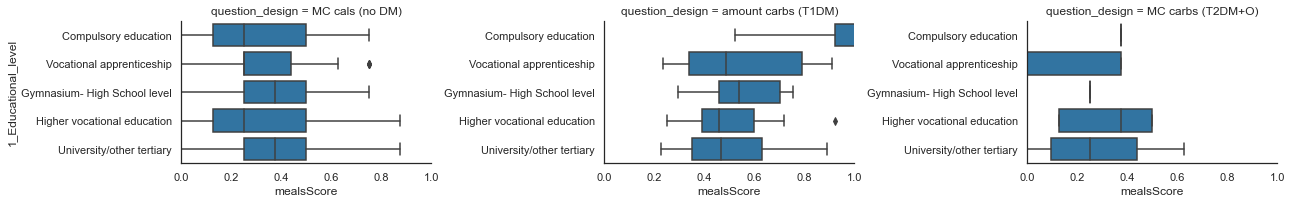

In [108]:
g = sns.FacetGrid(df2, col="question_design", height = 3, aspect = 2, sharey=False)
g = g.map(sns.boxplot, "mealsScore", "1_Educational_level", order = education_order)
g.set(xlim=(0, 1))

/Users/marcbloech/opt/anaconda3/envs/env_3_8_8/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/marcbloech/opt/anaconda3/envs/env_3_8_8/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


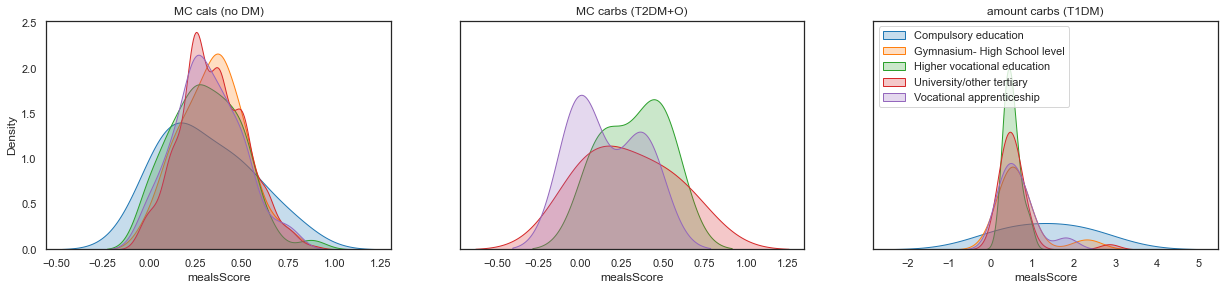

In [109]:
create_kde_plot("question_design", "1_Educational_level", "mealsScore", displot_height, df_input=df2)

In [110]:
# # Checking assumptions:

for t_group in question_design_type_list:
    print("## Target group: " + t_group)
    for group in list(df['1_Educational_level'].unique()):
        print("Education level: " + group)
        check_normality([df2[(df2["question_design"] == t_group) & (df2["1_Educational_level"] == group)]["mealsScore"]])
    print("#####################\n")

## Target group: MC cals (no DM)
Education level: Vocational apprenticeship
Group no. 1:
n = 103
                  W     pval  normal
mealsScore  1.68461  0.43072    True
Attention: Sample size of smallest group >100 (n=103), hence normality assumption can be neglected!

Education level: University/other tertiary
Group no. 1:
n = 418
                  W     pval  normal
mealsScore  5.62221  0.06014    True
Attention: Sample size of smallest group >100 (n=418), hence normality assumption can be neglected!

Education level: Higher vocational education
Group no. 1:
n = 103
                  W     pval  normal
mealsScore  2.40282  0.30077    True
Attention: Sample size of smallest group >100 (n=103), hence normality assumption can be neglected!

Education level: Compulsory education
Group no. 1:
n = 9
Shapiro-Wilk p-val: 0.44226
Normal: True

Education level: Gymnasium- High School level
Group no. 1:
n = 62
                  W     pval  normal
mealsScore  0.20058  0.90457    True
#########

In [111]:
# ==> Because for some of the groups the residuals 
# aren't normally distributed & n<25, we will use the Kruskall wallis test
# out of efficiency purposes (i.e. to use a loop)

for t_group in question_design_type_list:
    print("Target group: " + t_group)
    
    df_temp = df2[df2["question_design"] == t_group]
    
    stat, p_val = stats.kruskal(        
        df_temp[df_temp["1_Educational_level"] == "Vocational apprenticeship"].mealsScore.dropna(), 
        df_temp[df_temp["1_Educational_level"] == "University/other tertiary"].mealsScore.dropna(), 
        df_temp[df_temp["1_Educational_level"] == "Higher vocational education"].mealsScore.dropna(),
        df_temp[df_temp["1_Educational_level"] == "Compulsory education"].mealsScore.dropna(),
        df_temp[df_temp["1_Educational_level"] == "Gymnasium- High School level"].mealsScore.dropna()
    )

    print("Degrees of freedom: " + str(len(df_temp["1_Educational_level"].unique())-1))
    #Evaluation
    eval_pval()
    print("__________\n")

Target group: MC cals (no DM)
Degrees of freedom: 4
=> No statistically significant difference
__________

Target group: amount carbs (T1DM)
Degrees of freedom: 4
=> No statistically significant difference
__________

Target group: MC carbs (T2DM+O)
Degrees of freedom: 4
=> No statistically significant difference
__________



#### BMI correlation (within each group)

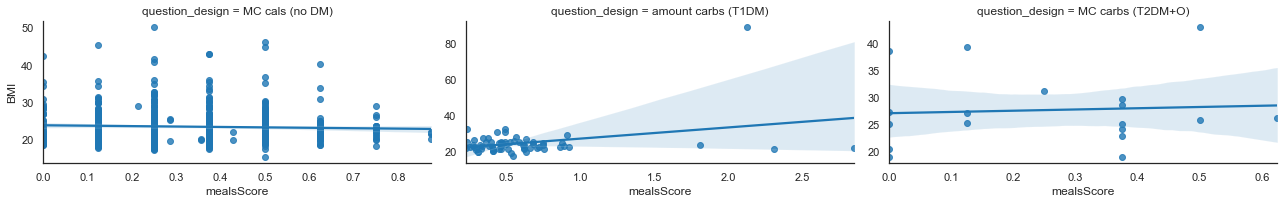

In [112]:
# Assumptions of pearson's correlation coefficient:

# 1) Continous data for both variables: yes

# 2) linearly related variables
# -> check via scatter plot
g = sns.FacetGrid(df2, col="question_design", height = 3, aspect = 2, sharex=False, sharey=False)
g = g.map(sns.regplot, "mealsScore", "BMI")

In [113]:
# 3) Both variables are normally distributed in all target groups

for t_group in question_design_type_list:
    print("Target group: " + t_group)
    
    # BMI:
    # 1 Normality
    check_normality([df2[df2["question_design"]==t_group].BMI, df2[df2["question_design"]==t_group].generalScore])

Target group: MC cals (no DM)
Group no. 1:
n = 695
             W  pval  normal
BMI  343.68265   0.0   False
Group no. 2:
n = 695
                    W     pval  normal
generalScore  0.39556  0.82055    True
Attention: Sample size of smallest group >100 (n=695), hence normality assumption can be neglected!

Target group: amount carbs (T1DM)
Group no. 1:
n = 64
             W  pval  normal
BMI  124.78308   0.0   False
Group no. 2:
n = 64
                     W  pval  normal
generalScore  64.45922   0.0   False
Target group: MC carbs (T2DM+O)
Group no. 1:
n = 18
Shapiro-Wilk p-val: 0.04552
Normal: False

Group no. 2:
n = 18
Shapiro-Wilk p-val: 0.22906
Normal: True



In [114]:
# data not normally distributed, therefore use non-parametric alternativ
# => spearman's rank correlation

for t_group in question_design_type_list:
    print("Target group: " + t_group)
    calculate_correlation_multigroup('BMI', 'mealsScore', type="spearman")
    print("\n")

Target group: MC cals (no DM)
Degrees of freedom: 693
Correlation coefficient: -0.01491
p-value: 0.694869
=> No statistically significant difference


Target group: amount carbs (T1DM)
Degrees of freedom: 62
Correlation coefficient: 0.02244
p-value: 0.860308
=> No statistically significant difference


Target group: MC carbs (T2DM+O)
Degrees of freedom: 16
Correlation coefficient: 0.12739
p-value: 0.614441
=> No statistically significant difference




#### overweight vs normal weight

/Users/marcbloech/opt/anaconda3/envs/env_3_8_8/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/marcbloech/opt/anaconda3/envs/env_3_8_8/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


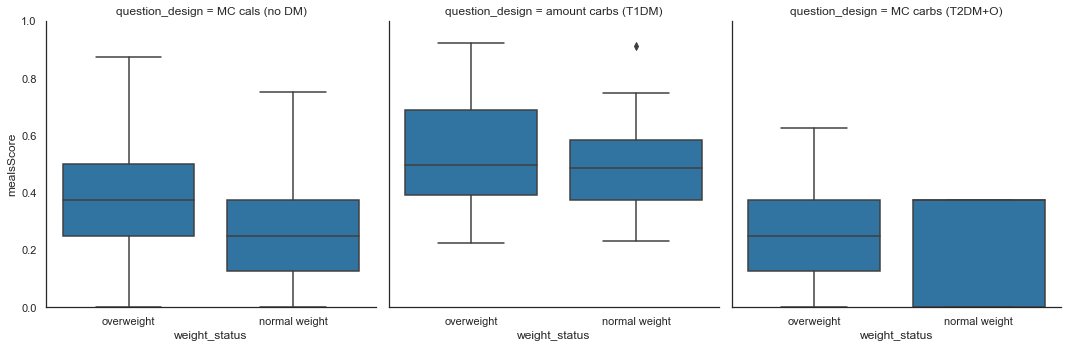

In [115]:
df_temp = df2.copy()
df_temp['weight_status'] = np.where(df2['BMI'] >= 25, "overweight", "normal weight")

# Initial visual inspection with plots

# ATTENTION: "diabetes_type2" also includes "other type of diabetes"!

g = sns.FacetGrid(df_temp, col="question_design", size=5)
g = g.map(sns.boxplot, "weight_status", "mealsScore")
g.set(ylim=(0, 1))

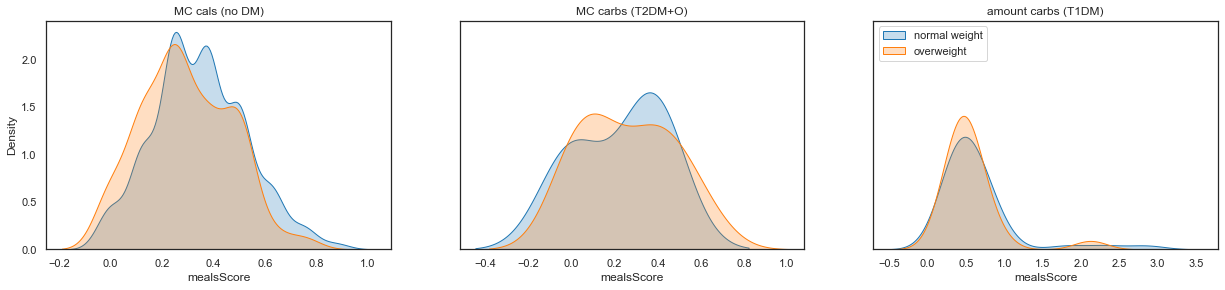

In [116]:
create_kde_plot("question_design", "weight_status", "mealsScore", displot_height, df_input=df_temp)

In [117]:
# Assess assumptions within each group

for t_group in question_design_type_list:
    print("Target group: " + t_group)
    
    df_temp2 = df_temp[df_temp["question_design"] == t_group]

    values_group1 = list(df_temp2[df_temp2["weight_status"]=="overweight"].mealsScore.dropna())
    values_group2 = list(df_temp2[df_temp2["weight_status"]=="normal weight"].mealsScore.dropna())

    # 1 Normality
    check_normality([values_group1, values_group2])
        
    print("----------------")

Target group: MC cals (no DM)
Group no. 1:
n = 164
         W     pval  normal
0  3.63351  0.16255    True
Group no. 2:
n = 531
         W     pval  normal
0  6.68164  0.03541   False
Attention: Sample size of smallest group >100 (n=164), hence normality assumption can be neglected!

----------------
Target group: amount carbs (T1DM)
Group no. 1:
n = 21
Shapiro-Wilk p-val: 0.0
Normal: False

Group no. 2:
n = 43
Shapiro-Wilk p-val: 0.0
Normal: False

----------------
Target group: MC carbs (T2DM+O)
Group no. 1:
n = 13
Shapiro-Wilk p-val: 0.19436
Normal: True

Group no. 2:
n = 5
Shapiro-Wilk p-val: 0.00647
Normal: False

----------------


In [118]:
# Non-normal distribution in some groups => use MWU Test instead

for t_group in question_design_type_list:
    print("Target group: " + t_group)
    df_temp2 = df_temp.copy()
    df_temp2 = df_temp2[df_temp2["question_design"] == t_group]
    values_group1 = list(df_temp2[df_temp2["weight_status"]=="overweight"].mealsScore.dropna())
    values_group2 = list(df_temp2[df_temp2["weight_status"]=="normal weight"].mealsScore.dropna())
    
    shortcut_mwu(values_group1, values_group2)
    
    print("---------------------------")

Target group: MC cals (no DM)
Mean Group 1 = 0.29366, SD Group 1 = 0.17385
Median Group 1 = 0.25, IQR Group 1 = 0.25
n Group 1: 164
Mean Group 2 = 0.34554, SD Group 2 = 0.17946
Median Group 2 = 0.375, IQR Group 2 = 0.25
n Group 2: 531
       U-val alternative     p-val       RBC      CLES
MWU  36738.0   two-sided  0.001979  0.156263  0.421869
"=> Statistically significant difference between the two groups found"
---------------------------
Target group: amount carbs (T1DM)
Mean Group 1 = 0.56647, SD Group 1 = 0.38484
Median Group 1 = 0.48743, IQR Group 1 = 0.207
n Group 1: 21
Mean Group 2 = 0.64265, SD Group 2 = 0.50853
Median Group 2 = 0.49681, IQR Group 2 = 0.29698
n Group 2: 43
     U-val alternative     p-val       RBC      CLES
MWU  415.0   two-sided  0.606731  0.080842  0.459579
=> No statistically significant difference
---------------------------
Target group: MC carbs (T2DM+O)
Mean Group 1 = 0.25962, SD Group 1 = 0.20488
Median Group 1 = 0.25, IQR Group 1 = 0.25
n Group 1: 13


#### obese vs non-obese

/Users/marcbloech/opt/anaconda3/envs/env_3_8_8/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


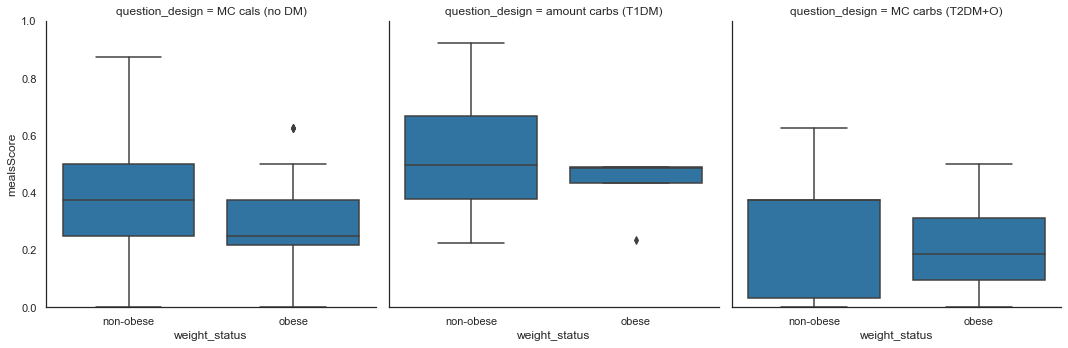

In [119]:
df_temp = df2.copy()
df_temp['weight_status'] = np.where(df2['BMI'] >= 30, "obese", "non-obese")

# Initial visual inspection with plots

# ATTENTION: "diabetes_type2" also includes "other type of diabetes"!

g = sns.FacetGrid(df_temp, col="question_design", height=5)
g = g.map(sns.boxplot, "weight_status", "mealsScore")
g.set(ylim=(0, 1))

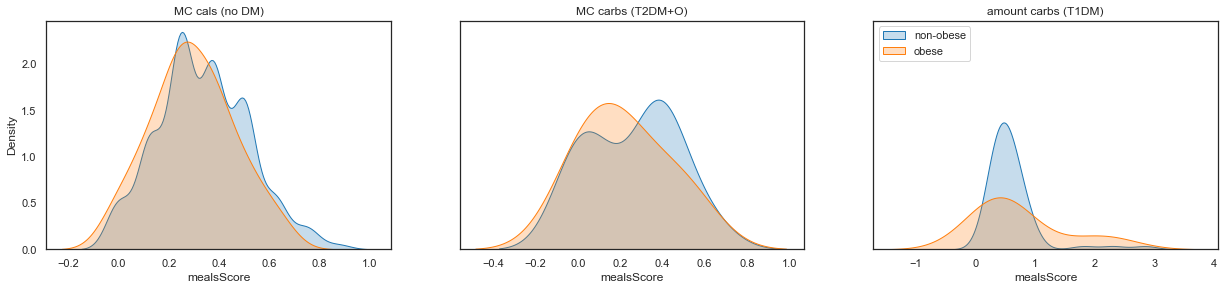

In [120]:
create_kde_plot("question_design", "weight_status", "mealsScore", displot_height, df_input=df_temp)

In [121]:
# Assess assumptions within each group

for t_group in question_design_type_list:
    print("Target group: " + t_group)
    
    df_temp2 = df_temp[df_temp["question_design"] == t_group]

    values_group1 = list(df_temp2[df_temp2["weight_status"]=="obese"].mealsScore.dropna())
    values_group2 = list(df_temp2[df_temp2["weight_status"]=="non-obese"].mealsScore.dropna())

    # 1 Normality
    check_normality([values_group1, values_group2])
        
    print("----------------")

Target group: MC cals (no DM)
Group no. 1:
n = 48
Shapiro-Wilk p-val: 0.01558
Normal: False

Group no. 2:
n = 647
         W     pval  normal
0  8.24844  0.01618   False
----------------
Target group: amount carbs (T1DM)
Group no. 1:
n = 5
Shapiro-Wilk p-val: 0.00502
Normal: False

Group no. 2:
n = 59
          W  pval  normal
0  68.36544   0.0   False
----------------
Target group: MC carbs (T2DM+O)
Group no. 1:
n = 4
Shapiro-Wilk p-val: 0.84997
Normal: True

Group no. 2:
n = 14
Shapiro-Wilk p-val: 0.02749
Normal: False

----------------


In [122]:
# Non-normal distribution in some groups => use MWU Test instead

for t_group in question_design_type_list:
    print("Target group: " + t_group)
    df_temp2 = df_temp.copy()
    df_temp2 = df_temp2[df_temp2["question_design"] == t_group]
    values_group1 = list(df_temp2[df_temp2["weight_status"]=="obese"].mealsScore.dropna())
    values_group2 = list(df_temp2[df_temp2["weight_status"]=="non-obese"].mealsScore.dropna())

    shortcut_mwu(values_group1, values_group2)
    
    print("---------------------------")

Target group: MC cals (no DM)
Mean Group 1 = 0.29427, SD Group 1 = 0.16236
Median Group 1 = 0.25, IQR Group 1 = 0.15625
n Group 1: 48
Mean Group 2 = 0.33619, SD Group 2 = 0.18038
Median Group 2 = 0.375, IQR Group 2 = 0.25
n Group 2: 647
       U-val alternative     p-val       RBC      CLES
MWU  13595.5   two-sided  0.141299  0.124453  0.437774
=> No statistically significant difference
---------------------------
Target group: amount carbs (T1DM)
Mean Group 1 = 0.75438, SD Group 1 = 0.69163
Median Group 1 = 0.48743, IQR Group 1 = 0.05667
n Group 1: 5
Mean Group 2 = 0.60607, SD Group 2 = 0.44757
Median Group 2 = 0.49681, IQR Group 2 = 0.28837
n Group 2: 59
     U-val alternative     p-val       RBC      CLES
MWU  138.0   two-sided  0.827216  0.064407  0.467797
=> No statistically significant difference
---------------------------
Target group: MC carbs (T2DM+O)
Mean Group 1 = 0.21875, SD Group 1 = 0.18488
Median Group 1 = 0.1875, IQR Group 1 = 0.21875
n Group 1: 4
Mean Group 2 = 0.2589

***

### Error rate of single questions in part 1 per group of interest

significant groups: gender, eudcation level, overweight vs normal, obese vs non-obese

In [123]:
# chi-squared test with similar proportions

alpha = 0.05

def question_correctness_chi2_test(question_name, grouping_variable, df=df):
    df_temp = df[[question_name, grouping_variable]].dropna().copy()

    if grouping_variable=="1_Gender":
        df_temp = df_temp[df_temp["1_Gender"] != "various"]

    df_temp["correct"] = np.where(
        df_temp[question_name]==correct_answers_dict[question_name],
        1,0)

    data_crosstab = pd.crosstab(
                        df_temp[grouping_variable],
                        df_temp['correct'],
                        margins=True, margins_name="Total")
    print(data_crosstab)
    data_crosstab = data_crosstab.head(2)

    stat, p, dof, expected = chi2_contingency(data_crosstab)
    print('Degrees of Freedom = %d' % dof)


    # interpreting test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('\nProbability = %.3f, critical value = %.3f, test statistic = %.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Test statistic is larger than critical value => difference is significant (reject H0)')
    else:
        print('Test statistic is not larger than critical value (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('\np = %.3f' % (p))
    if p <= alpha:
        print("\x1b[31m\"P-value <= 0.05! Statistically significant\"\x1b[0m")
        print('')
    else:
        print('P-Value not significant')

from pandas.plotting import parallel_coordinates

def error_analysis_shortcut(column_of_interest, df=df):
    df_subset = df_right_wrong[part1_questions].copy()
    df_subset= df_subset.apply(pd.to_numeric, errors='coerce')
    df_subset[column_of_interest] = df[column_of_interest]

    df_subset = df_subset.groupby(column_of_interest, as_index=False)[part1_questions].mean()

    parallel_coordinates(df_subset, class_column= column_of_interest, colormap=plt.get_cmap("Set2"))
    plt.show()

    for question in part1_questions:
        print("\nQuestion: " + question)
        question_correctness_chi2_test(question, column_of_interest, df=df)
        print("############ \n")    

    return df_subset

In [124]:
part1_questions = ['2_1_Carbohydrates_quantitativ', '2_2_Dietary_fibres', '2_3_Proteins', '2_4_Energy_density', '2_5_Fat_quality', '2_6_Salt']
correct_answers_part1 = [20.0, "Red beans", "Salami", "Nature Chips", "Mayonnaise", "Appenzeller cheese slice"]

correct_answers_dict = dict(zip(part1_questions, correct_answers_part1))
correct_answers_dict

{'2_1_Carbohydrates_quantitativ': 20.0,
 '2_2_Dietary_fibres': 'Red beans',
 '2_3_Proteins': 'Salami',
 '2_4_Energy_density': 'Nature Chips',
 '2_5_Fat_quality': 'Mayonnaise',
 '2_6_Salt': 'Appenzeller cheese slice'}

In [125]:
df_right_wrong = df.copy()

for question in part1_questions:
    df_right_wrong.loc[df_right_wrong[question] != correct_answers_dict[question], question] = False
    df_right_wrong.loc[df_right_wrong[question] == correct_answers_dict[question], question] = True
    
df_right_wrong[question].value_counts()

True     613
False    166
Name: 2_6_Salt, dtype: int64

In [126]:
#Overall share of correct answers
for question in part1_questions:
    num_correct = df[df[question]==correct_answers_dict[question]].userId.count()
    num_total = df[question].count()

    print(question)
    print("correct answers:" + str(num_correct))
    print("share of correct: " + str(round((num_correct/num_total),4)) + "\n")

2_1_Carbohydrates_quantitativ
correct answers:250
share of correct: 0.3439

2_2_Dietary_fibres
correct answers:589
share of correct: 0.7781

2_3_Proteins
correct answers:51
share of correct: 0.0676

2_4_Energy_density
correct answers:306
share of correct: 0.4158

2_5_Fat_quality
correct answers:181
share of correct: 0.2394

2_6_Salt
correct answers:613
share of correct: 0.8024



### Overall distribution of correct answers

#### Gender

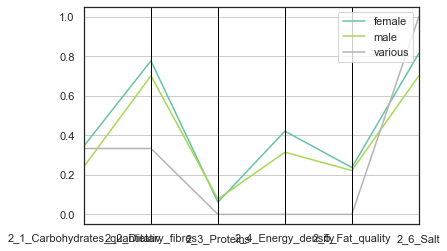


Question: 2_1_Carbohydrates_quantitativ
correct     0    1  Total
1_Gender                 
female    342  202    544
male      134   47    181
Total     476  249    725
Degrees of Freedom = 2

Probability = 0.950, critical value = 5.991, test statistic = 7.509
Test statistic is larger than critical value => difference is significant (reject H0)

p = 0.023
"P-value <= 0.05! Statistically significant"

############ 


Question: 2_2_Dietary_fibres
correct     0    1  Total
1_Gender                 
female    115  452    567
male       52  136    188
Total     167  588    755
Degrees of Freedom = 2

Probability = 0.950, critical value = 5.991, test statistic = 4.461
Test statistic is not larger than critical value (fail to reject H0)

p = 0.107
P-Value not significant
############ 


Question: 2_3_Proteins
correct     0   1  Total
1_Gender                
female    534  36    570
male      168  15    183
Total     702  51    753
Degrees of Freedom = 2

Probability = 0.950, critical value

,1_Gender,2_1_Carbohydrates_quantitativ,2_2_Dietary_fibres,2_3_Proteins,2_4_Energy_density,2_5_Fat_quality,2_6_Salt
0,female,0.347079,0.776632,0.061856,0.420962,0.237113,0.814433
1,male,0.242268,0.701031,0.077320,0.314433,0.221649,0.701031
2,various,0.333333,0.333333,0.000000,0.000000,0.000000,1.000000


In [127]:
error_analysis_shortcut("1_Gender")

#### Age groups

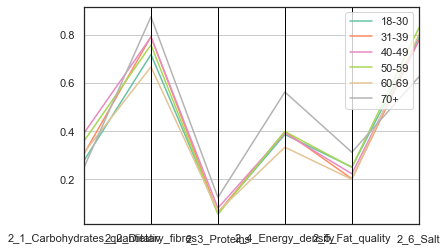


Question: 2_1_Carbohydrates_quantitativ
correct    0    1  Total
1_Age                   
18-30    172   72    244
31-39    115   56    171
40-49     81   58    139
50-59     71   46    117
60-69     26   14     40
70+       12    4     16
Total    477  250    727
Degrees of Freedom = 2

Probability = 0.950, critical value = 5.991, test statistic = 0.495
Test statistic is not larger than critical value (fail to reject H0)

p = 0.781
P-Value not significant
############ 


Question: 2_2_Dietary_fibres
correct    0    1  Total
1_Age                   
18-30     65  186    251
31-39     34  145    179
40-49     30  117    147
50-59     27   97    124
60-69     10   30     40
70+        2   14     16
Total    168  589    757
Degrees of Freedom = 2

Probability = 0.950, critical value = 5.991, test statistic = 2.809
Test statistic is not larger than critical value (fail to reject H0)

p = 0.246
P-Value not significant
############ 


Question: 2_3_Proteins
correct    0   1  Total
1_Age    

,1_Age,2_1_Carbohydrates_quantitativ,2_2_Dietary_fibres,2_3_Proteins,2_4_Energy_density,2_5_Fat_quality,2_6_Salt
0,18-30,0.277992,0.718147,0.061776,0.386100,0.250965,0.787645
1,31-39,0.306011,0.792350,0.060109,0.398907,0.202186,0.775956
2,40-49,0.391892,0.790541,0.081081,0.391892,0.222973,0.777027
3,50-59,0.359375,0.757812,0.054688,0.398438,0.250000,0.828125
4,60-69,0.311111,0.666667,0.066667,0.333333,0.200000,0.800000
5,70+,0.250000,0.875000,0.125000,0.562500,0.312500,0.625000


In [128]:
error_analysis_shortcut("1_Age")

#### Education level

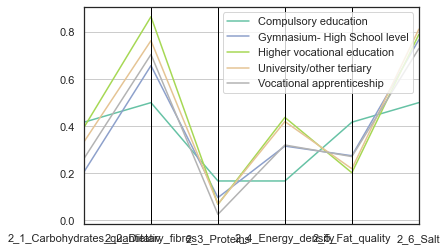


Question: 2_1_Carbohydrates_quantitativ
correct                         0    1  Total
1_Educational_level                          
Compulsory education            7    5     12
Gymnasium- High School level   54   15     69
Higher vocational education    66   47    113
University/other tertiary     269  151    420
Vocational apprenticeship      81   32    113
Total                         477  250    727
Degrees of Freedom = 2

Probability = 0.950, critical value = 5.991, test statistic = 2.183
Test statistic is not larger than critical value (fail to reject H0)

p = 0.336
P-Value not significant
############ 


Question: 2_2_Dietary_fibres
correct                         0    1  Total
1_Educational_level                          
Compulsory education            6    6     12
Gymnasium- High School level   24   48     72
Higher vocational education    12  103    115
University/other tertiary      96  346    442
Vocational apprenticeship      30   86    116
Total                       

,1_Educational_level,2_1_Carbohydrates_quantitativ,2_2_Dietary_fibres,2_3_Proteins,2_4_Energy_density,2_5_Fat_quality,2_6_Salt
0,Compulsory education,0.416667,0.500000,0.166667,0.166667,0.416667,0.500000
1,Gymnasium- High School level,0.205479,0.657534,0.095890,0.315068,0.273973,0.767123
2,Higher vocational education,0.394958,0.865546,0.067227,0.436975,0.201681,0.789916
3,University/other tertiary,0.333333,0.763797,0.068433,0.419426,0.218543,0.812362
4,Vocational apprenticeship,0.262295,0.704918,0.024590,0.319672,0.270492,0.729508


In [129]:
error_analysis_shortcut("1_Educational_level")

#### Overweight vs normal weight

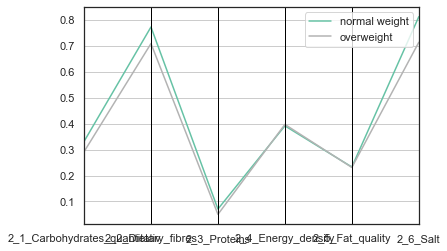


Question: 2_1_Carbohydrates_quantitativ
correct          0    1  Total
weight_status                 
normal weight  345  192    537
overweight     132   58    190
Total          477  250    727
Degrees of Freedom = 2

Probability = 0.950, critical value = 5.991, test statistic = 1.700
Test statistic is not larger than critical value (fail to reject H0)

p = 0.427
P-Value not significant
############ 


Question: 2_2_Dietary_fibres
correct          0    1  Total
weight_status                 
normal weight  118  448    566
overweight      50  141    191
Total          168  589    757
Degrees of Freedom = 2

Probability = 0.950, critical value = 5.991, test statistic = 2.349
Test statistic is not larger than critical value (fail to reject H0)

p = 0.309
P-Value not significant
############ 


Question: 2_3_Proteins
correct          0   1  Total
weight_status                
normal weight  524  41    565
overweight     179  10    189
Total          703  51    754
Degrees of Freedom = 2


,weight_status,2_1_Carbohydrates_quantitativ,2_2_Dietary_fibres,2_3_Proteins,2_4_Energy_density,2_5_Fat_quality,2_6_Salt
0,normal weight,0.331034,0.772414,0.070690,0.391379,0.232759,0.812069
1,overweight,0.291457,0.708543,0.050251,0.396985,0.231156,0.713568


In [130]:
df_temp_weight = df.copy()
df_temp_weight['weight_status'] = np.where(df['BMI'] >= 25, "overweight", "normal weight")

error_analysis_shortcut("weight_status", df = df_temp_weight)

#### Obese vs non-obese

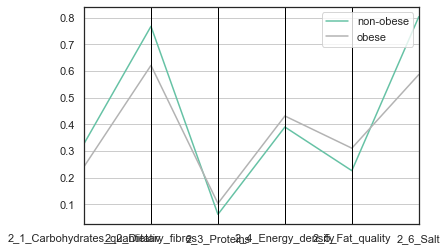


Question: 2_1_Carbohydrates_quantitativ
correct          0    1  Total
weight_status                 
non-obese      435  236    671
obese           42   14     56
Total          477  250    727
Degrees of Freedom = 2

Probability = 0.950, critical value = 5.991, test statistic = 2.370
Test statistic is not larger than critical value (fail to reject H0)

p = 0.306
P-Value not significant
############ 


Question: 2_2_Dietary_fibres
correct          0    1  Total
weight_status                 
non-obese      150  553    703
obese           18   36     54
Total          168  589    757
Degrees of Freedom = 2

Probability = 0.950, critical value = 5.991, test statistic = 4.179
Test statistic is not larger than critical value (fail to reject H0)

p = 0.124
P-Value not significant
############ 


Question: 2_3_Proteins
correct          0   1  Total
weight_status                
non-obese      652  45    697
obese           51   6     57
Total          703  51    754
Degrees of Freedom = 2


,weight_status,2_1_Carbohydrates_quantitativ,2_2_Dietary_fibres,2_3_Proteins,2_4_Energy_density,2_5_Fat_quality,2_6_Salt
0,non-obese,0.327323,0.76699,0.062413,0.389736,0.226075,0.803051
1,obese,0.241379,0.62069,0.103448,0.431034,0.310345,0.586207


In [131]:
df_temp_weight = df.copy()
df_temp_weight['weight_status'] = np.where(df['BMI'] >= 30, "obese", "non-obese")

error_analysis_shortcut("weight_status", df = df_temp_weight)

#### Diabetic vs non-diabetic

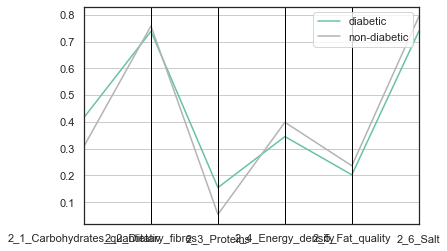


Question: 2_1_Carbohydrates_quantitativ
correct            0    1  Total
diabetes_status                 
diabetic          42   35     77
non-diabetic     435  215    650
Total            477  250    727
Degrees of Freedom = 2

Probability = 0.950, critical value = 5.991, test statistic = 4.675
Test statistic is not larger than critical value (fail to reject H0)

p = 0.097
P-Value not significant
############ 


Question: 2_2_Dietary_fibres
correct            0    1  Total
diabetes_status                 
diabetic          18   62     80
non-diabetic     150  527    677
Total            168  589    757
Degrees of Freedom = 2

Probability = 0.950, critical value = 5.991, test statistic = 0.005
Test statistic is not larger than critical value (fail to reject H0)

p = 0.998
P-Value not significant
############ 


Question: 2_3_Proteins
correct            0   1  Total
diabetes_status                
diabetic          69  13     82
non-diabetic     634  38    672
Total            703  51 

,diabetes_status,2_1_Carbohydrates_quantitativ,2_2_Dietary_fibres,2_3_Proteins,2_4_Energy_density,2_5_Fat_quality,2_6_Salt
0,diabetic,0.416667,0.738095,0.154762,0.345238,0.202381,0.738095
1,non-diabetic,0.309353,0.758273,0.054676,0.398561,0.235971,0.792806


In [132]:
df_temp_diabetes = df.copy()
df_temp_diabetes['diabetes_status'] = np.where(df['diabetes_detail'] =="none", "non-diabetic", "diabetic")

error_analysis_shortcut("diabetes_status", df = df_temp_diabetes)

##### Types of diabetes

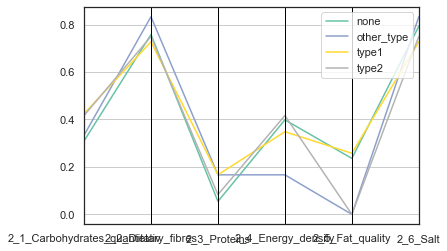


Question: 2_1_Carbohydrates_quantitativ
correct            0    1  Total
diabetes_detail                 
none             435  215    650
other_type         4    2      6
type1             31   28     59
type2              7    5     12
Total            477  250    727
Degrees of Freedom = 2

Probability = 0.950, critical value = 5.991, test statistic = 0.000
Test statistic is not larger than critical value (fail to reject H0)

p = 1.000
P-Value not significant
############ 


Question: 2_2_Dietary_fibres
correct            0    1  Total
diabetes_detail                 
none             150  527    677
other_type         1    5      6
type1             14   48     62
type2              3    9     12
Total            168  589    757
Degrees of Freedom = 2

Probability = 0.950, critical value = 5.991, test statistic = 0.104
Test statistic is not larger than critical value (fail to reject H0)

p = 0.949
P-Value not significant
############ 


Question: 2_3_Proteins
correct            0 

,diabetes_detail,2_1_Carbohydrates_quantitativ,2_2_Dietary_fibres,2_3_Proteins,2_4_Energy_density,2_5_Fat_quality,2_6_Salt
0,none,0.309353,0.758273,0.054676,0.398561,0.235971,0.792806
1,other_type,0.333333,0.833333,0.166667,0.166667,0.000000,0.833333
2,type1,0.424242,0.727273,0.166667,0.348485,0.257576,0.727273
3,type2,0.416667,0.750000,0.083333,0.416667,0.000000,0.750000


In [133]:
error_analysis_shortcut("diabetes_detail")